# <center> <font color='blue'>**LINEAR REGRESSION**</font> </center>

### **Importing Libraries**

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **All About Data**

In [2]:
df = pd.read_csv(r"C:\Users\91939\Downloads\Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
frame = df.loc["Serial No.":]
frame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
frame = list(df.columns)

In [9]:
df.columns[[8]]

Index(['Chance of Admit '], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E26B0EA88>]],
      dtype=object)

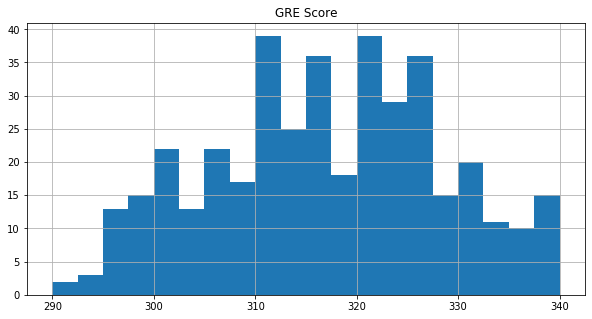

In [10]:
# Plotting graphs
df.hist(column="GRE Score", bins=20, figsize=(10,5))

In [11]:
df.loc[1]

Serial No.             2.00
GRE Score            324.00
TOEFL Score          107.00
University Rating      4.00
SOP                    4.00
LOR                    4.50
CGPA                   8.87
Research               1.00
Chance of Admit        0.76
Name: 1, dtype: float64

#### **Making DataFrame**

In [12]:
X_df = df.drop(df.columns[[0, 2, 3, 4, 5, 6, 7, 8]], axis = 1)
Y_df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7]], axis = 1)

In [13]:
X_df.head()

,GRE Score
0,337
1,324
2,316
3,322
4,314


In [14]:
Y_df.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [15]:
print("Shape X_df : ", X_df.shape)
print("Shape Y_df : ", Y_df.shape)

Shape X_df :  (400, 1)
Shape Y_df :  (400, 1)


### **Spliting Into Training And Testing Data**

In [16]:
X_train = X_df.sample(frac = 0.8, random_state = 200)
X_test = X_df.drop(X_train.index)

Y_train = Y_df.sample(frac = 0.8, random_state = 200)
Y_test = Y_df.drop(Y_train.index)

In [17]:
# Changing into array

X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
Y_train_arr = Y_train.to_numpy()
Y_test_arr = Y_test.to_numpy()

In [18]:
print("Input Train Shape : ", X_train_arr.shape)
print("Input Test Shape : ", X_test_arr.shape)

Input Train Shape :  (320, 1)
Input Test Shape :  (80, 1)


In [19]:
print("Output Train Shape : ", Y_train_arr.shape)
print("Output Test Shape : ", Y_test_arr.shape)

Output Train Shape :  (320, 1)
Output Test Shape :  (80, 1)


### **Data Visualization**

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

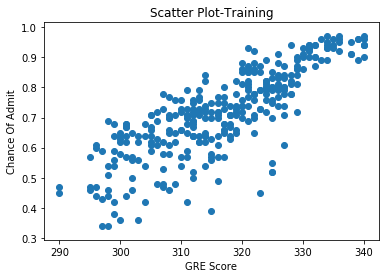

In [20]:
plt.scatter(X_train_arr, Y_train_arr)
plt.title("Scatter Plot-Training")
plt.xlabel("GRE Score")
plt.ylabel("Chance Of Admit")
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

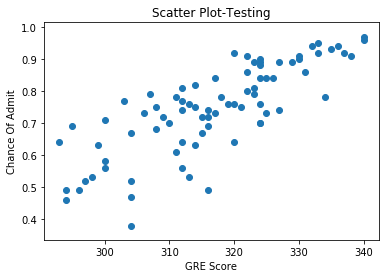

In [21]:
plt.scatter(X_test_arr, Y_test_arr)
plt.title("Scatter Plot-Testing")
plt.xlabel("GRE Score")
plt.ylabel("Chance Of Admit")
plt

### **Initializing Parameters**

In [22]:
def initialize_with_zeros(dim):
    theta = []
    weight = np.zeros((dim, 1))
    bias = 0
    theta.append(weight)
    theta.append(bias)
    return theta

### **Hypothesis Function**

In [23]:
def hypothesis(theta, x):
    z = x * theta[1] + theta[0]
    return z

### **Cost Function**

In [24]:
def cost_func(x, y, theta):
    sum = 0
    for i in range(len(x)):
        sum += (hypothesis(theta, x[i]) - y[i]) ** 2
    return sum / len(x)

### **Gradient Function**

In [25]:
def grad_func(x, y, theta, l_rate):
    slope_drev = 0
    const_drev = 0
    cost_each_iter = []
    revised_param = []
    
    for i in range(len(x)):
        slope_drev += 2 * x[i] * (hypothesis(theta, x[i]) - y[i])
        const_drev += 2 * (hypothesis(theta, x[i]) - y[i])
        cost_each_iter.append(cost_func(x, y, theta)[0])
        theta[1] -= l_rate * slope_drev
        theta[0] -= l_rate * const_drev
        revised_param = {"slope": theta[1], "constant": theta[0]}
    
    return cost_each_iter, revised_param

### **Training**

In [26]:
def train(x, y, theta, l_rate, iterations):
    param = []
    
    for i in range(iterations):
        cost_each_iter, revised_param = grad_func(x, y, theta, l_rate)
        theta[1] = revised_param["slope"]
        theta[0] = revised_param["constant"]
        
        if i % 10 == 0:
            print("Cost at ", i, "th iteration:", cost_func(x, y, theta)[0])
        
        param = {"slope": theta[1], "constant": theta[0]}
        
    return param, cost_each_iter, revised_param

### **Prediction Function**

In [27]:
def predict(after_hypo, m):
    m = m.shape[0]
    y_pred = np.zeros((1, m))
    y_prediction = []
    for i in range(after_hypo.shape[0]):
        if after_hypo[i, 0] > -5.882497e+32:         # Setting 75% as its decision boundary           
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0
        y_prediction.append(y_pred[0, i])
    return y_prediction

### **Loading Into A Model**

In [28]:
def model():
    l_rate = 0.000001
    iterations = 500
    theta = initialize_with_zeros(1)
    param, cost_each_iter, revised_param = train(X_train_arr, Y_train_arr, theta, l_rate, iterations)
    return param, cost_each_iter, revised_param

In [29]:
param, cost_each_iter, revised_param = model()

Cost at  0 th iteration: [2.06549363]
Cost at  10 th iteration: [358.20807446]
Cost at  20 th iteration: [9172.69569357]
Cost at  30 th iteration: [187761.32524189]
Cost at  40 th iteration: [3670496.91157792]
Cost at  50 th iteration: [71021187.89460465]
Cost at  60 th iteration: [1.37101017e+09]
Cost at  70 th iteration: [2.64523004e+10]
Cost at  80 th iteration: [5.10309698e+11]
Cost at  90 th iteration: [9.84446812e+12]
Cost at  100 th iteration: [1.8991006e+14]
Cost at  110 th iteration: [3.66355796e+15]
Cost at  120 th iteration: [7.06737312e+16]
Cost at  130 th iteration: [1.36336752e+18]
Cost at  140 th iteration: [2.63007332e+19]
Cost at  150 th iteration: [5.07367645e+20]
Cost at  160 th iteration: [9.78763309e+21]
Cost at  170 th iteration: [1.88813304e+23]
Cost at  180 th iteration: [3.64239888e+24]
Cost at  190 th iteration: [7.02655445e+25]
Cost at  200 th iteration: [1.35549315e+27]
Cost at  210 th iteration: [2.61488287e+28]
Cost at  220 th iteration: [5.04437253e+29]
C

In [30]:
theta = []
theta.append(param["constant"])
theta.append(param["slope"])
after_hypo = hypothesis(theta, X_train_arr)
train_pred = predict(after_hypo, X_train_arr)
after_hypo_test = hypothesis(theta, X_test_arr)
test_pred = predict(after_hypo_test, X_test_arr)

In [31]:
print(after_hypo.shape)
df_afterHypo = pd.DataFrame(after_hypo)
df_afterHypo.describe()

(320, 1)


,0
count,3.200000e+02
mean,-6.050995e+32
std,2.168339e+31
min,-6.493698e+32
25%,-6.207197e+32
50%,-6.054397e+32
75%,-5.882497e+32
max,-5.538697e+32


In [32]:
after_hypo = df_afterHypo.to_numpy()

In [33]:
print(train_pred)

[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,

In [34]:
print(test_pred)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]


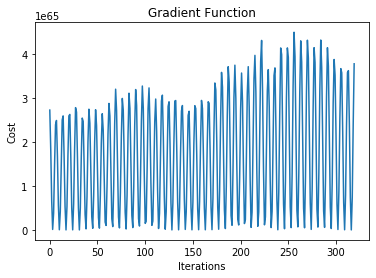

In [35]:
plt.plot(cost_each_iter)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Function")
plt.show()

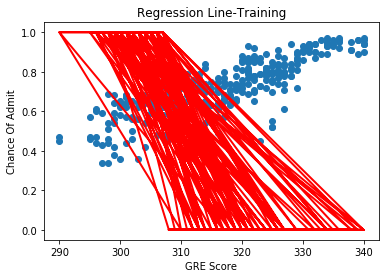

In [36]:
plt.scatter(X_train_arr, Y_train_arr)
plt.title("Regression Line-Training")
plt.xlabel("GRE Score")
plt.ylabel("Chance Of Admit")
plt.plot(X_train_arr, train_pred, color='red', linewidth=2)
plt.show()

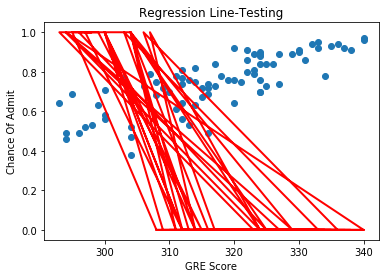

In [37]:
plt.scatter(X_test_arr, Y_test_arr)
plt.title("Regression Line-Testing")
plt.xlabel("GRE Score")
plt.ylabel("Chance Of Admit")
plt.plot(X_test_arr, test_pred, color='red', linewidth=2)
plt.show()

In [38]:
print("Train Accuracy: {} %".format(100 - np.mean(np.abs(train_pred - Y_train_arr))))
print("Test Accuracy: {} %".format(100 - np.mean(np.abs(test_pred - Y_test_arr))))

Train Accuracy: 99.379515625 %
Test Accuracy: 99.364975 %
